In [11]:
import pandas as pd
import  numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# LINEAR DISCRIMINANT ANALYSE

In [8]:
path = r"C:\Users\Utilisateur\Desktop\Projet_interpromo_2k22\ProjectInterPromo\data\Donnees_v1.csv"

In [9]:
data = pd.read_csv(path)


In [18]:
quali_col = []
count = 0
for i, name in zip(data.dtypes, data.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data.drop(columns=quali_col + ["Unnamed: 0"])


In [26]:
'''
solvers : {‘svd’, ‘lsqr’, ‘eigen’}


'''
df = data_quanti.sample(100000)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [27]:
X , Y = df.drop(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'],1) , df['TOP_FRAUDE']

In [42]:
clf = LinearDiscriminantAnalysis()
clf.fit(X , Y)

LinearDiscriminantAnalysis()

In [61]:
coefficients = clf.coef_
#plt.plot(clf.xbar_)
# EQM
X_test = data_quanti.sample(50000)
Y_test = X_test['TOP_FRAUDE']
X_test = X_test.drop(['TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'TOP_FRAUDE_VIREMENT'],1) 


In [62]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
# evaluation
from sklearn.metrics import precision_recall_curve, auc
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    print(f'l''aire sous la courbe{value}')
    print(f'le f1_score est{f1_score}')
    print(f'la precision est{precision}')
    print(f'le recall est{recall}')
    return value, f1_score, precision, recall


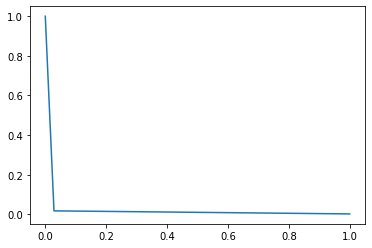

laire sous la courbe{value}
le f1_score est[0.0041912  0.02173913 0.        ]
la precision est[0.0021     0.01754386 1.        ]
le recall est[1.         0.02857143 0.        ]


(0.02407764411027569,
 array([0.0041912 , 0.02173913, 0.        ]),
 array([0.0021    , 0.01754386, 1.        ]),
 array([1.        , 0.02857143, 0.        ]))

In [66]:
evaluation(clf.predict(X_test) , Y_test, True)

In [110]:
importances = clf.coef_

In [139]:
importances = importances.reshape(393 , 1)

d = dict(zip(data_quanti.columns , importances))
d_tri = sorted(d.items(), key=lambda t: np.abs(t[1]))
d_tri[-1][0]

'seg_nature_potentiel_HDG DYNAMIQUE'

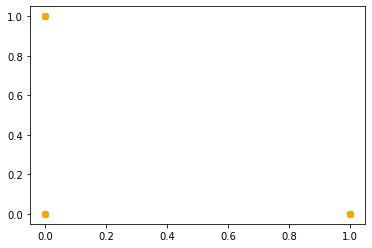

In [151]:
plt.scatter(data_quanti[data_quanti["TOP_FRAUDE"]==0][d_tri[-1][0]], data_quanti[data_quanti["TOP_FRAUDE"]==0][d_tri[-2][0]], alpha=0.2, c="orange", label="Not Fraude")
#plt.scatter(data_quanti[data_quanti["TOP_FRAUDE"]==1][d_tri[-1][0]], data_quanti[data_quanti["TOP_FRAUDE"]==1][d_tri[-2][0]], alpha=0.7, c="blue", label="Fraude")
#plt.legend()
plt.show()

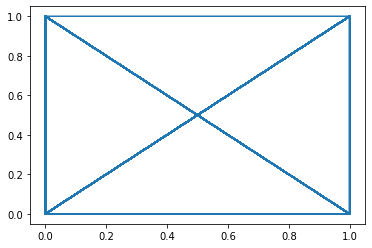

In [148]:
plt.plot(data_quanti[d_tri[-1][0]] , data_quanti['TOP_FRAUDE'])
plt.savefig

In [152]:
dir(clf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_max_components',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_solve_eigen',
 '_solve_lsqr',
 '_solve_svd',
 '_validate_data',
 'classes_',
 'coef_',
 'covariance_estimator',
 'decision_function',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_params',
 'intercept_',
 'means_',
 'n_components',
 'n_features_in_',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'priors_',
 'scalings_',
 'score',
 'set_params',
 'shrinkage',
 'sol